In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/seattle-weather.csv")
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='str')

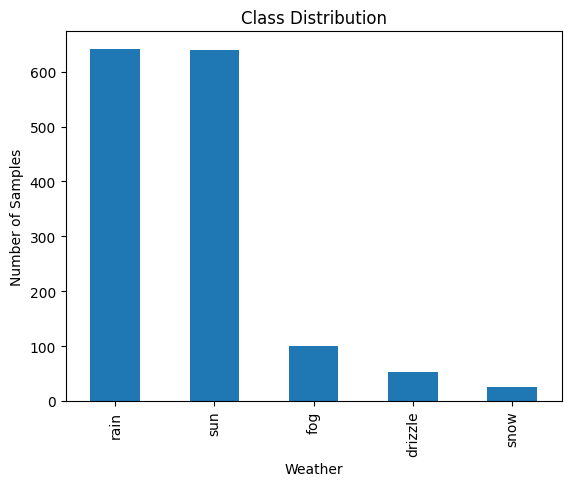

In [3]:
weather_frequency = df['weather'].value_counts()

weather_frequency.plot(kind='bar')

plt.xlabel("Weather")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

We find this to be pretty imbalanced (rain and sun are enormous classes compared to the rest), so we can do oversampling to even them out.

In [4]:
# Define features and labels
df = df.drop(columns = 'date')
X = df.drop(columns = 'weather')
y = df['weather']

In [5]:
# Define as training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ros = RandomOverSampler(random_state = 42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Check train class distribution
print("Balanced class distribution in training data")
print(Counter(y_train_balanced))

Balanced class distribution in training data
Counter({'rain': 449, 'sun': 449, 'fog': 449, 'drizzle': 449, 'snow': 449})


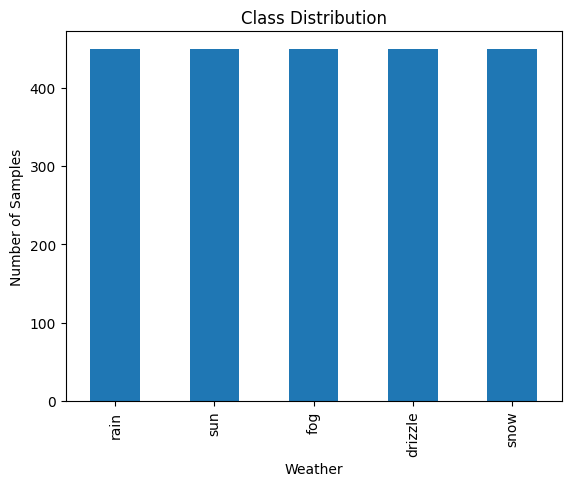

In [6]:
# Visualization of balance
balanced_counts = y_train_balanced.value_counts()

balanced_counts.plot(kind='bar')

plt.xlabel("Weather")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

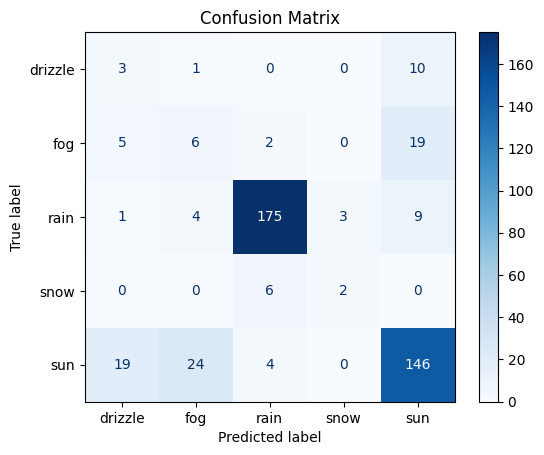

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.11      0.21      0.14        14
         fog       0.17      0.19      0.18        32
        rain       0.94      0.91      0.92       192
        snow       0.40      0.25      0.31         8
         sun       0.79      0.76      0.77       193

    accuracy                           0.76       439
   macro avg       0.48      0.46      0.47       439
weighted avg       0.78      0.76      0.77       439



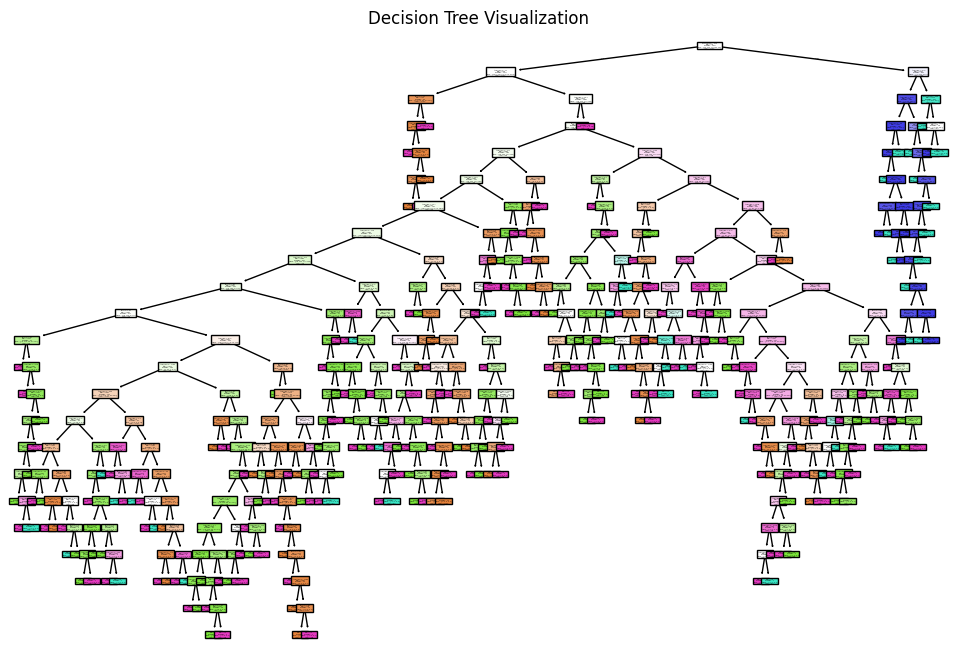

In [7]:
# Initialize and train decision tree classifier
clf = DecisionTreeClassifier()
param_grid = {
    'max depth': [2,3,4,5,None],
    'min_samples_split': [2,4,6,10],
    'min_samples_leaf': [1,2,4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20]
}

clf.fit(X_train_balanced, y_train_balanced)
# Predict on test data
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification report
report = classification_report(y_test, y_pred, labels = clf.classes_)
print("Classification Report:")
print(report)

#Visualize Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names = clf.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()